**IMPORTING RELEVANT LIBRARIES**

In [17]:
%pip install wordcloud imbalanced-learn
%pip install -U imbalanced-learn
%pip install -U scikit-learn
%pip install -U seaborn
%pip install -U matplotlib
%pip install nltk
%pip install -U pandas
%pip install -U numpy
%pip install -U matplotlib
%pip install -U wordcloud
%pip install -U tqdm
%pip install -U pyspellchecker

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re # Regular expressions
import nltk
from nltk.corpus import stopwords # Stop words removal
from nltk.tokenize import word_tokenize # Word tokenization
from nltk.stem import WordNetLemmatizer  # Word lemmatization
# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF vectorization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample, shuffle
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

[nltk_data] Downloading package punkt to C:\Users\Taqi
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Taqi
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Taqi
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Taqi
[nltk_data]     Haider\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Loading the dataset
data = pd.read_csv("ReviewsDataset.csv")


In [4]:
# Checking the shape
data.shape

(568454, 10)

In [5]:
#Checking the Cloumns
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
# Previewing the dataset
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Checking the Scores/Ratings Distribution
data.Score.value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [8]:
# Checking for Missing Values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
# Dropping the Rows with Missing Values
data.dropna(inplace=True)

In [20]:
# Checking the shape again
data.shape

(568401, 10)

In [16]:
# Removing the unnecessary features and retaining the relevant features for Sentiment Analysis
data = data[['Score','Summary','Text']]

In [15]:
# Previewing the dataset again
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
# Making the copy of the dataset
df = data.copy()

In [18]:
# Concatenating the Summary and Text features
df['Review'] = df['Summary'] + " " + df['Text']
df = df.drop(['Summary','Text'],axis=1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy Great taffy at a great price. The...


In [19]:
# Cleaning the Dataset

def clean_text(text):
    text = re.sub(r'<.*?>', '', text) # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = text.lower() # Convert to lowercase
    return text

df['Review'] = df['Review'].apply(clean_text)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food i have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised product arrived labeled as j...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight says it all this is a confection that ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine if you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy great taffy at a great price ther...


In [20]:
# Initializing the stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining a function to preprocess the text
def preprocess_text(review):
    # Tokenization
    tokens = word_tokenize(review)

    # Stopword Removal
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

     # Join the tokens back into a string
    cleaned_review = ' '.join(lemmatized_tokens)

    return cleaned_review

# Applying the function to the Review column
df['cleaned_review'] = df['Review'].apply(preprocess_text)

df = df.drop(['Review'], axis=1)

In [21]:
# Previewing the data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,cleaned_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food bought several vitality ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,advertised product arrived labeled jumbo salte...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,delight say confection around century light pi...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine looking secret ingredient robit...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy great taffy great price wide assor...


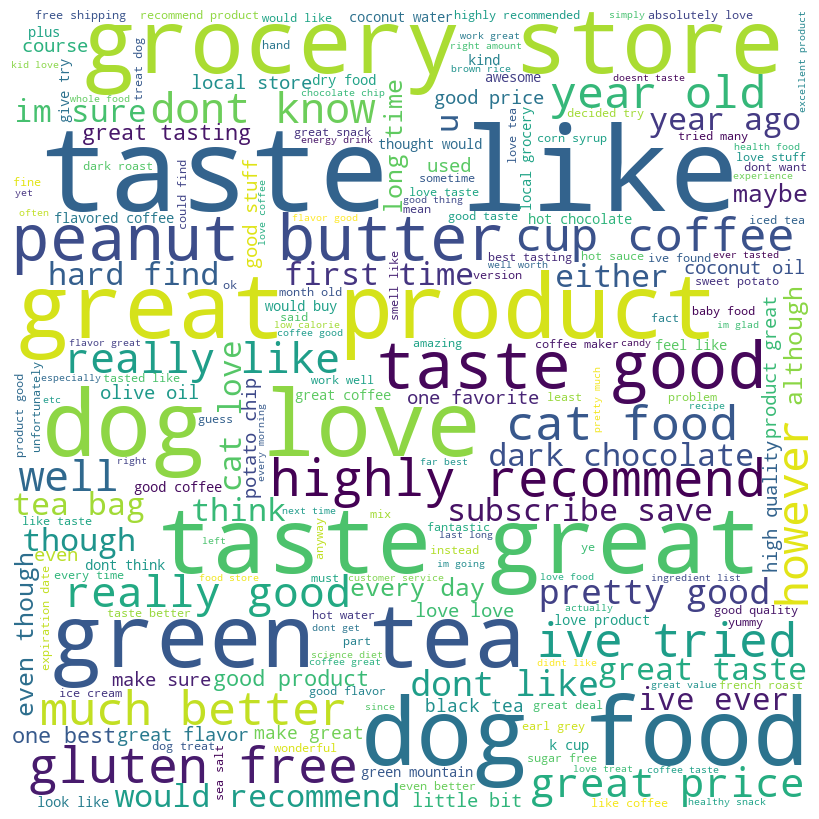

In [22]:
# Combining all cleaned reviews into a single string
text = ' '.join(df['cleaned_review'].astype(str).tolist())

# Creating a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words, # Use the stop words you defined earlier
                min_font_size = 10).generate(text)

# Plotting the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [23]:
# Defining sentiment labels based on the rating
def get_sentiment(rating):
    if rating < 3.0:
        return 'negative'
    elif rating >= 4.0:
        return 'positive'
    else:
        return 'neutral'

# Applying the function to create a new sentiment column
df['sentiment'] = df['Score'].apply(get_sentiment)

# Dropping the rating column as it has served its purpose
df = df.drop(['Score'], axis=1)

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,cleaned_review,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,good quality dog food bought several vitality ...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,advertised product arrived labeled jumbo salte...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,delight say confection around century light pi...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,cough medicine looking secret ingredient robit...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,great taffy great taffy great price wide assor...,positive


sentiment
positive    443756
negative     82007
neutral      42638
Name: count, dtype: int64


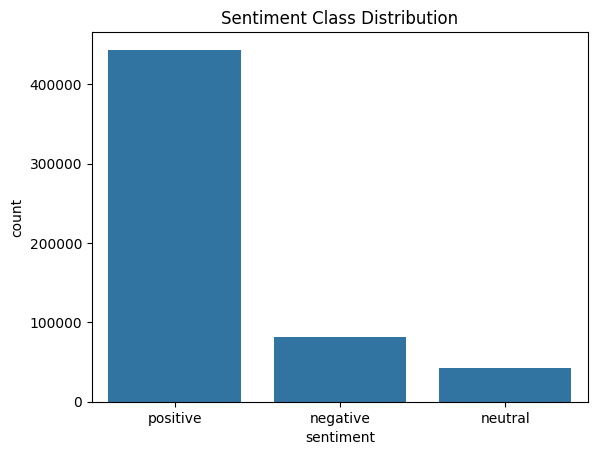

In [24]:
# Checking for class distribution
print(df['sentiment'].value_counts())

# Visualize the distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()

In [25]:
# Encode the sentiment labels using LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,cleaned_review,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,good quality dog food bought several vitality ...,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,advertised product arrived labeled jumbo salte...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,delight say confection around century light pi...,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,cough medicine looking secret ingredient robit...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,great taffy great taffy great price wide assor...,2


In [26]:
# Separate the classes
positive_reviews = df[df['sentiment'] == 2]
neutral_reviews = df[df['sentiment'] == 1]
negative_reviews = df[df['sentiment'] == 0]

# Downsample positive reviews
positive_reviews_downsampled = resample(positive_reviews,
                                        replace=False,     # sample without replacement
                                        n_samples=85000,   # match the negative sample size
                                        random_state=42)   # for reproducibility

# Combine downsampled positives with original neutral and negative
balanced_df = pd.concat([positive_reviews_downsampled, neutral_reviews, negative_reviews])

In [27]:
balanced_df.shape

(209645, 9)

sentiment
2    85000
0    82007
1    42638
Name: count, dtype: int64


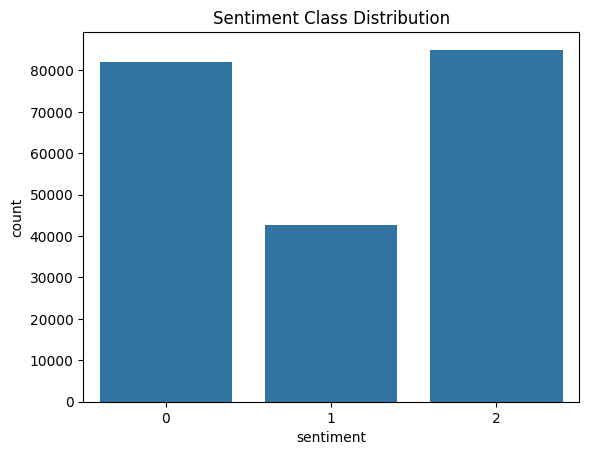

In [28]:
print(balanced_df.value_counts('sentiment'))

# Visualize the distribution
sns.countplot(x='sentiment', data=balanced_df)
plt.title('Sentiment Class Distribution')
plt.show()

In [29]:
# Shuffling the data
balanced_df = shuffle(balanced_df, random_state=42)

In [30]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['cleaned_review'], balanced_df['sentiment'], stratify=balanced_df['sentiment'], train_size=0.8 , test_size=0.2, random_state=42)

In [31]:
#TF-IDF Vectorization
vect = TfidfVectorizer(max_features=7500, ngram_range=(1, 2), max_df=0.85, min_df=2)
X_train_vectorized = vect.fit_transform(X_train)  # Fit on training data
X_test_vectorized = vect.transform(X_test)        # Transform test data with the same vectorizer


In [32]:
import pickle
# Save the vectorized datasets to a file using pickle
with open('vectorized_data.pkl', 'wb') as file:
    pickle.dump(vect, file)


In [33]:
# Checking the Vocabulary Size
vocab_size = len(vect.vocabulary_)
print("Vocabulary size:", vocab_size)

Vocabulary size: 7500


In [34]:
#SMOTE Upsampling on Training Data
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vectorized, y_train)

# LOGISTIC REGRESSION

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

In [36]:
print("Best Hyperparameters:", best_params)
print(best_model)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
LogisticRegression(C=10)


In [38]:
# Initialize the logistic regression model with L2 regularization (default for 'penalty' is 'l2')
log_reg_model = LogisticRegression(penalty='l2', C=10, solver='lbfgs', max_iter=1000, random_state=42)

# Train the model on the vectorized training data
log_reg_model.fit(X_train_balanced, y_train_balanced)


LogisticRegression(C=10, max_iter=1000, random_state=42)

In [39]:
# Predict on the vectorized test set
y_pred = log_reg_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7897397982303418
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82     16401
           1       0.56      0.68      0.61      8528
           2       0.88      0.84      0.86     17000

    accuracy                           0.79     41929
   macro avg       0.76      0.77      0.76     41929
weighted avg       0.80      0.79      0.79     41929

Confusion Matrix:
 [[12995  2632   774]
 [ 1636  5774  1118]
 [  741  1915 14344]]


In [40]:
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

# SVM(SUPPORT VECTOR MACHINE

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)

In [ ]:
y_pred = svm_model.predict(X_test_vectorized)

In [51]:
svm_accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", svm_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

SVM Model Accuracy: 0.7884757566362184

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82     16401
           1       0.55      0.70      0.62      8528
           2       0.90      0.83      0.86     17000

    accuracy                           0.79     41929
   macro avg       0.76      0.77      0.77     41929
weighted avg       0.81      0.79      0.79     41929



In [52]:
with open('SVM.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# DATAFRAME VISUALIZATION (ACCURACY AND LOSS)

In [59]:
data = {
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': [0.7899, 0.7884],
    'Loss':[1-0.7899, 1-0.7884]
}
df = pd.DataFrame(data)

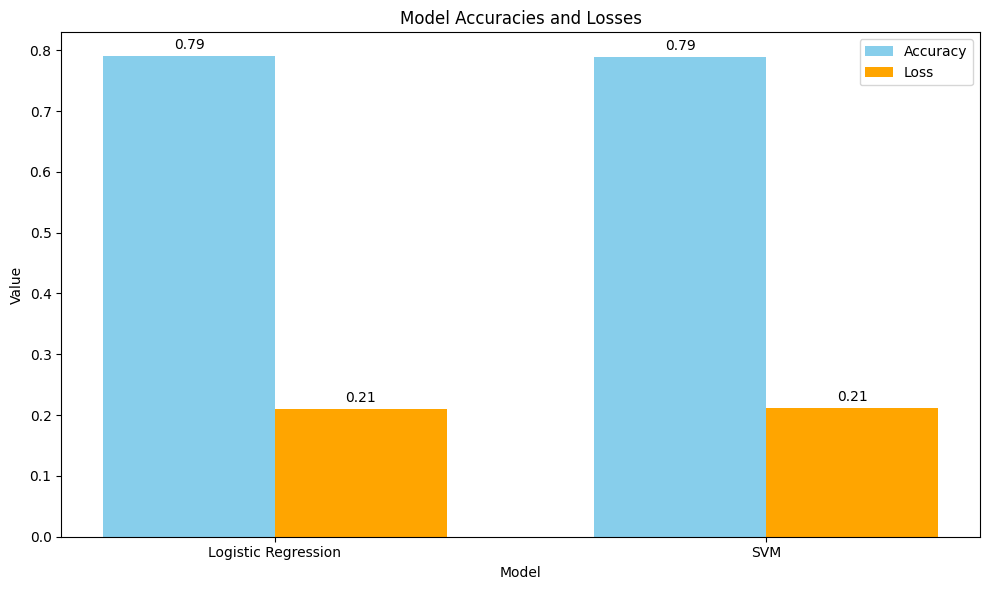

In [60]:
# Create a grouped bar chart
x = np.arange(len(df['Model']))  # Position of groups on the x-axis
width = 0.35  # Width of the bars

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Accuracy and Loss
accuracy_bars = ax.bar(x - width/2, df['Accuracy'], width, label='Accuracy', color='skyblue')
loss_bars = ax.bar(x + width/2, df['Loss'], width, label='Loss', color='orange')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.set_title('Model Accuracies and Losses')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend()

# Add value annotations on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Text to display
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Position
                    xytext=(0, 3),  # Offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(accuracy_bars)
add_labels(loss_bars)

# Show the plot
plt.tight_layout()
plt.show()

In [61]:

metrics_dict = {
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': ['79%', '79%'],
    'Precision': ['80%', '80%'],
    'Recall': ['79%', '79%'],
    'F1-Score': ['79%', '79%'],
    'TrainingTime (mins)': [25, 723]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df


,Model,Accuracy,Precision,Recall,F1-Score,TrainingTime (mins)
0,Logistic Regression,79%,80%,79%,79%,25
1,SVM,79%,80%,79%,79%,723
